# Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from implementations import *
from data_processing import *

# Data loading

In [11]:
DATA_TRAIN_PATH = 'data/train.csv'
DATA_TEST_PATH = 'data/test.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

# Data preprocessing
1. Replace missing values (-999) with the mean of the column.
2. Standardize.

In [12]:
tX, tX_test = fix_nonexisting(tX, tX_test)
tX, tX_test = standardize(tX, tX_test)

# Cross Validation
The following Code is used to find optimal parameter for the models with Cross Validation.

## Cross Validation degree for Linear Regression

In [5]:
def run_cross_validation_least_degree(y, x, seed, k_fold):
    degrees = [i for i in range(4, 16)]
    k_indices = build_k_indices(y, k_fold, seed)
    rmse_tr = []
    rmse_te = []
    rmse_vr = []
    rmse_ve = []
    for degree in degrees:
        m_tr, m_te = [], []
        for i in range(k_fold):
            loss_tr, loss_te = cross_validation_least_degree(
                y, x, k_indices, i, degree)
            m_tr.append(np.sqrt(2*loss_tr))
            m_te.append(np.sqrt(2*loss_te))
        rmse_tr.append(np.mean(np.array(m_tr)))
        rmse_te.append(np.mean(np.array(m_te)))
        rmse_vr.append(np.std(np.array(m_tr)))
        rmse_ve.append(np.std(np.array(m_te)))
    return rmse_tr, rmse_te, rmse_vr, rmse_ve


Test Error 0.8523966835677232
Train Error 0.851658631273969
Test Variance 0.005281462178859358
Train Variance 0.0012552993865059564
Optimal Degree 11


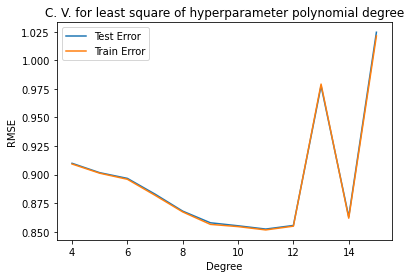

In [7]:
seed = 53
k_fold = 5
Lr, Le, Vr, Ve = run_cross_validation_least_degree(y, tX, seed, k_fold)
print(f"Test Error {np.min(np.array(Le))}")
print(f"Train Error {Lr[np.argmin(np.array(Le))]}")
print(f"Test Variance {Ve[np.argmin(np.array(Le))]}")
print(f"Train Variance {Vr[np.argmin(np.array(Lr))]}")
degrees = [i for i in range(4, 16)]
print(f"Optimal Degree {degrees[np.argmin(np.array(Le))]}")
plt.plot(degrees, Le, label='Test Error')
plt.plot(degrees, Lr, label='Train Error')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("C. V. for least square of hyperparameter polynomial degree")
plt.legend(loc=2)
plt.savefig("figs/cross_validation_least_degree.pdf")


## Cross Validation lambda for Ridge Regression

In [8]:
def cross_validation_lambda(y, x, seed, k_fold):
    lambdas = np.logspace(-10, -1, 30)
    k_indices = build_k_indices(y, k_fold, seed)‚
    rmse_tr = []
    rmse_te = []
    rmse_vr = []
    rmse_ve = []
    for lambda_ in lambdas:
        m_tr, m_te = [], []
        for i in range(k_fold):
            loss_tr, loss_te = cross_validation_ridge(
                y, x, k_indices, i, lambda_)
            m_tr.append(np.sqrt(2*loss_tr))
            m_te.append(np.sqrt(2*loss_te))
        rmse_tr.append(np.mean(np.array(m_tr)))
        rmse_te.append(np.mean(np.array(m_te)))
        rmse_vr.append(np.std(np.array(m_tr)))
        rmse_ve.append(np.std(np.array(m_te)))
    return rmse_tr, rmse_te, rmse_vr, rmse_ve


Test Error 1.059625304202022
Train Error 1.059184170236215
Test Variance 0.003196043612422046
Train Variance 0.0009452624084978082
Optimal Lambda: 0.005736152510448681


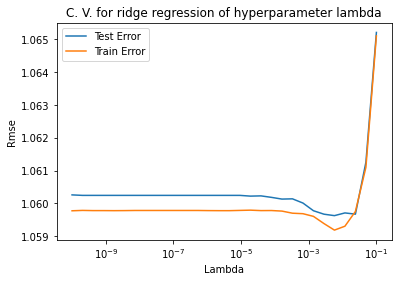

In [9]:
seed = 53
k_fold = 5
Lr, Le, Vr, Ve = cross_validation_lambda(y, tX, seed, k_fold)
print(f"Test Error {np.min(np.array(Le))}")
print(f"Train Error {Lr[np.argmin(np.array(Le))]}")
print(f"Test Variance {Ve[np.argmin(np.array(Le))]}")
print(f"Train Variance {Vr[np.argmin(np.array(Lr))]}")
lambdas = np.logspace(-10, -1, 30)
print(f"Optimal Lambda: {lambdas[np.argmin(np.array(Le))]}")
plt.semilogx(lambdas, Le, label='Test Error')
plt.semilogx(lambdas, Lr, label='Train Error')
plt.xlabel("Lambda")
plt.ylabel("Rmse")
plt.title("C. V. for ridge regression of hyperparameter lambda")
plt.legend(loc=2)‚
plt.savefig("figs/cross_validation_ridge_lamdas.pdf")


## Cross Validation degree for Logistic Regression

In [5]:
def log_cross_validation_degree(y, x, seed, k_fold):
    degrees = [i for i in range(1, 5)]
    k_indices = build_k_indices(y, k_fold, seed)
    rmse_tr = []
    rmse_te = []
    rmse_vr = []
    rmse_ve = []
    for degree in degrees:
        m_tr, m_te = [], []
        for i in range(k_fold):
            loss_tr, loss_te = cross_validation_log_degree(
                y, x, k_indices, i, degree)
            m_tr.append(loss_tr)
            m_te.append(loss_te)
        rmse_tr.append(np.mean(np.array(m_tr)))
        rmse_te.append(np.mean(np.array(m_te)))
        rmse_vr.append(np.std(np.array(m_tr)))
        rmse_ve.append(np.std(np.array(m_te)))
    return rmse_tr, rmse_te, rmse_vr, rmse_ve


Test Error 0.47402000056289034
Train Error 0.4737863492525972
Test Variance 0.0024942027550023693
Train Variance 0.0009729360535563641
Optimal Degree 2


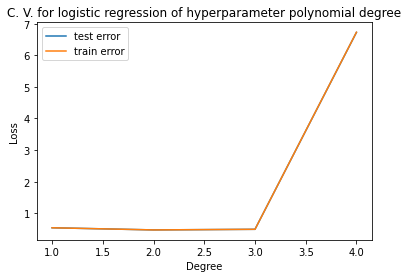

In [6]:
seed = 53
k_fold = 5
yl = y.copy()
yl[yl == -1] = 0
Lr, Le, Vr, Ve = log_cross_validation_degree(yl, tX, seed, k_fold)
print(f"Test Error {np.min(np.array(Le))}")
print(f"Train Error {Lr[np.argmin(np.array(Le))]}")
print(f"Test Variance {Ve[np.argmin(np.array(Le))]}")
print(f"Train Variance {Vr[np.argmin(np.array(Lr))]}")
degrees = [i for i in range(1, 5)]
print(f"Optimal Degree {degrees[np.argmin(np.array(Le))]}")
plt.plot(degrees, Le, label='test error')
plt.plot(degrees, Lr, label='train error')
plt.xlabel("Degree")
plt.ylabel("Loss")
plt.title("C. V. for logistic regression of hyperparameter polynomial degree")
plt.legend(loc=2)
# plt.grid(True)
plt.savefig("figs/cross_validation_log_degree.pdf")


## Cross Validation lambda for Logistic Regression

In [18]:
def reg_log_cross_validation_lambda(y, x, seed, k_fold):
    lambdas = np.logspace(-15, -4, 10)

    k_indices = build_k_indices(y, k_fold, seed)
    rmse_tr = []
    rmse_te = []
    rmse_vr = []
    rmse_ve = []
    for lambda_ in lambdas:
        m_tr, m_te = [], []
        for i in range(k_fold):
            loss_tr, loss_te = cross_validation_reg_logistic_lambda(
                y, x, k_indices, i, lambda_)
            m_tr.append(np.sqrt(2*loss_tr))
            m_te.append(np.sqrt(2*loss_te))
        rmse_tr.append(np.mean(np.array(m_tr)))
        rmse_te.append(np.mean(np.array(m_te)))
        rmse_vr.append(np.std(np.array(m_tr)))
        rmse_ve.append(np.std(np.array(m_te)))
    print(rmse_tr)
    print(rmse_te)
    print(rmse_vr)
    print(rmse_ve)
    return rmse_tr, rmse_te, rmse_vr, rmse_ve


[1.0859926633769137, 1.0859951812928652, 1.0859802658310138, 1.0859910418065377, 1.0859896403917957, 1.085958548010033, 1.0859815569338962, 1.085986578276335, 1.0859976751034357, 1.0860140443506476]
[1.086047120350523, 1.0860491790737234, 1.0860321044444103, 1.086043100421293, 1.086043106285817, 1.0860185318450135, 1.0860344382734766, 1.0860421096092063, 1.0860552730232267, 1.0860402033593868]
[0.00022339606154603953, 0.00022838897922118493, 0.00025848836356424525, 0.00022910970028583715, 0.0002366717799998485, 0.00021560943914970633, 0.00021972302052055323, 0.00023714407382437696, 0.0002506236175054902, 0.00024891626662168796]
[0.0008405551463080156, 0.0008332804235356075, 0.0008020091874234727, 0.0008420833160257401, 0.0008305003766102821, 0.0008487608209533239, 0.0008490791830507399, 0.0008308896144671171, 0.0008119886218405943, 0.0008191594130462505]
test error 1.0860185318450135
train error 1.085958548010033
test variance 0.0008487608209533239
train variance 0.00021560943914970633

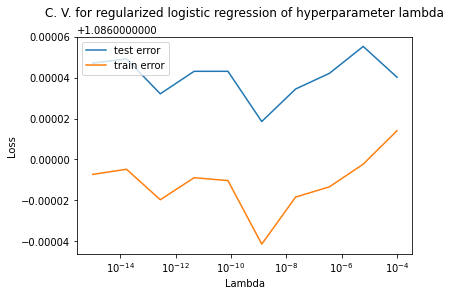

In [19]:
seed = 53
k_fold = 5
Lr, Le, Vr, Ve = reg_log_cross_validation_lambda(yl, tX, seed, k_fold)
print("test error", np.min(np.array(Le)))
print("train error", Lr[np.argmin(np.array(Le))])
print("test variance", Ve[np.argmin(np.array(Le))])
print("train variance", Vr[np.argmin(np.array(Le))])
d = np.logspace(-15, -4, 10)
print("Lambda", d[np.argmin(np.array(Le))])
plt.semilogx(d, Le, label='test error')
plt.semilogx(d, Lr, label='train error')
plt.xlabel("Lambda")
plt.ylabel("Loss")
plt.title(
    "C. V. for regularized logistic regression of hyperparameter lambda", pad=20)
plt.legend(loc=2)
plt.savefig("figs/reg_log_cross_validation_lambda.pdf")


# Compare all models
In the following all models are tested to find the optimal model. 
The first run is without feature expansion and the last one with feature expansion.

In [1]:
def score_reg(l_train, weights_square, xtrain, ytrain, xtest, ytest):
    l_test = compute_mse(ytest, xtest, weights_square)
    y_pred_tr = predict_labels(weights_square, xtrain)
    mae_train = np.sum(abs(ytrain-y_pred_tr))/2/len(ytrain)
    y_pred = predict_labels(weights_square, xtest)
    mae_test = np.sum(abs(ytest-y_pred))/2/len(ytest)
    return l_train, l_test, 1-mae_train, 1-mae_test


def score_class(l_train, weightsl, xtrainl, ytrainl, xtestl, ytestl):
    l_test = compute_log_loss(ytestl, xtestl, weightsl)
    y_pred_tr = predict_label_log(weightsl, xtrainl)
    mae_tr = np.sum(abs(ytrainl-y_pred_tr))/len(ytrainl)
    y_pred = predict_label_log(weightsl, xtestl)
    mae_te = np.sum(abs(ytestl-y_pred))/len(ytestl)
    return l_train, l_test, 1-mae_tr, 1-mae_te

## Without feature expansion

In [21]:
result = np.zeros((6, 5, 4))
seed = [53, 59, 61, 67, 71]
#seed = [53]
ltX = tX
for i in range(len(seed)):
    xtrain, xtest, ytrain, ytest = split_data(tX, y, 0.8, seed[i])
    initial_w = np.zeros(len(xtrain[0]))
    batch_size = len(xtrain)//20

    print('\n\nGradient descent: ')
    l_train, weights_g = least_squaresGD(ytrain, xtrain, initial_w, 10, 1e-10)
    result[0, i, :] = score_reg(
        l_train, weights_g, xtrain, ytrain, xtest, ytest)

    print('Stochastic Gradient descent: ')
    l_train, weights_sg = least_squaresSGD(
        ytrain, xtrain, initial_w, batch_size, 10, 1e-10)
    result[1, i, :] = score_reg(
        l_train, weights_sg, xtrain, ytrain, xtest, ytest)

    print('Least square : ')
    l_train, weights_square = least_squares(ytrain, xtrain)
    result[2, i, :] = score_reg(
        l_train, weights_square, xtrain, ytrain, xtest, ytest)
    print('Ridge regression: ')

    l_train, weights_ridge = ridge_regression(ytrain, xtrain, 5e-3)
    result[3, i, :] = score_reg(
        l_train, weights_ridge, xtrain, ytrain, xtest, ytest)

    xtrainl, xtestl, ytrainl, ytestl = split_data(ltX, y, 0.8, seed[i])
    ytrainl[ytrainl == -1] = 0
    ytestl[ytestl == -1] = 0
    initial_w = 0.1*np.random.rand(len(xtrainl[0]))
    batch_size = len(xtrainl)//20

    print('Logistic regression: ')
    l_train, weightsl = logistic_regression_stochastic_gradient(
        ytrainl, xtrainl, initial_w, batch_size, 1000, 1e-5)
    result[4, i, :] = score_class(
        l_train, weightsl, xtrainl, ytrainl, xtestl, ytestl)

    print('Regularized logistic regression: ')
    l_train, weightsl = reg_logistic_regression_stochatic_gradient(
        ytrainl, xtrainl, 1e-9, initial_w, batch_size, 1000, 1e-5)
    result[5, i, :] = score_class(
        l_train, weightsl, xtrainl, ytrainl, xtestl, ytestl)



Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


In [22]:
print('\n\nGradient descent: ')
print(f"Mean Loss train : {np.mean(result[0,:,0])}, std Loss train : {np.std(result[0,:,0])}")
print(f"Mean Loss test : {np.mean(result[0,:,1])}, std Loss test : {np.std(result[0,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[0,:,2])}, std Accuracy train : {np.std(result[0,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[0,:,3])}, std Accuracy test : {np.std(result[0,:,3])}")

print('\n\nStoch Gradient descent: ')
print(f"Mean Loss train : {np.mean(result[1,:,0])}, std Loss train : {np.std(result[1,:,0])}")
print(f"Mean Loss test : {np.mean(result[1,:,1])}, std Loss test : {np.std(result[1,:,2])}")
print(f"Mean Accuracy train : {np.mean(result[1,:,2])}, std Accuracy train : {np.std(result[1,:,3])}")
print(f"Mean Accuracy test : {np.mean(result[1,:,3])}, std Accuracy test : {np.std(result[1,:,3])}")

print('\n\nLeast Square ')
print(f"Mean Loss train : {np.mean(result[2,:,0])}, std Loss train : {np.std(result[2,:,0])}")
print(f"Mean Loss test : {np.mean(result[2,:,1])}, std Loss test : {np.std(result[2,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[2,:,2])}, std Accuracy train : {np.std(result[2,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[2,:,3])}, std Accuracy test : {np.std(result[2,:,3])}")

print('\n\nRidge Regression ')
print(f"Mean Loss train : {np.mean(result[3,:,0])}, std Loss train : {np.std(result[3,:,0])}")
print(f"Mean Loss test : {np.mean(result[3,:,1])}, std Loss test : {np.std(result[3,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[3,:,2])}, std Accuracy train : {np.std(result[3,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[3,:,3])}, std Accuracy test : {np.std(result[3,:,3])}")

print('\n\nLogistic Regression ')
print(f"Mean Loss train : {np.mean(result[4,:,0])}, std Loss train : {np.std(result[4,:,0])}")
print(f"Mean Loss test : {np.mean(result[4,:,1])}, std Loss test : {np.std(result[4,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[4,:,2])}, std Accuracy train : {np.std(result[4,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[4,:,3])}, std Accuracy test : {np.std(result[4,:,3])}")

print('\n\nRegularized Logistic Regression ')
print(f"Mean Loss train : {np.mean(result[5,:,0])}, std Loss train : {np.std(result[5,:,0])}")
print(f"Mean Loss test : {np.mean(result[5,:,1])}, std Loss test : {np.std(result[5,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[5,:,2])}, std Accuracy train : {np.std(result[5,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[5,:,3])}, std Accuracy test : {np.std(result[5,:,3])}")



Gradient descent: 
Mean Loss train : 0.630752, std Loss train : 0.0007596946755111563
Mean Loss test : 0.6325839999999999, std Loss test : 0.002616207942805763
Mean Accuracy train : 0.6846240000000001, std Accuracy train : 0.000379847337755552
Mean Accuracy test : 0.683708, std Accuracy test : 0.0013081039714028743


Stoch Gradient descent: 
Mean Loss train : 0.630838, std Loss train : 0.00069949696210921
Mean Loss test : 0.6333840000000001, std Loss test : 0.0003497484810545854
Mean Accuracy train : 0.684581, std Accuracy train : 0.001693592631065705
Mean Accuracy test : 0.683308, std Accuracy test : 0.001693592631065705


Least Square 
Mean Loss train : 0.561378, std Loss train : 0.0011624869891745146
Mean Loss test : 0.5622, std Loss test : 0.005052112429469498
Mean Accuracy train : 0.719311, std Accuracy train : 0.0005812434945872637
Mean Accuracy test : 0.7189, std Accuracy test : 0.002526056214734737


Ridge Regression 
Mean Loss train : 0.560908, std Loss train : 0.00115961027

## With feature expansion

In [23]:
ltX = build_poly(tX, 2)
ltX_test = build_poly(tX_test, 2)

tX = build_poly(tX, 11)
tX_test = build_poly(tX_test, 11)

In [25]:
result = np.zeros((6, 5, 4))
seed = [53, 59, 61, 67, 71]
for i in range(len(seed)):
    xtrain, xtest, ytrain, ytest = split_data(tX, y, 0.8, seed[i])
    initial_w = np.zeros(len(xtrain[0]))
    batch_size = len(xtrain)//20

    print('\n\nGradient descent: ')
    l_train, weights_g = least_squaresGD(ytrain, xtrain, initial_w, 10, 1e-10)
    result[0, i, :] = score_reg(
        l_train, weights_g, xtrain, ytrain, xtest, ytest)

    print('Stochastic Gradient descent: ')
    l_train, weights_sg = least_squaresSGD(
        ytrain, xtrain, initial_w, batch_size, 10, 1e-10)
    result[1, i, :] = score_reg(
        l_train, weights_sg, xtrain, ytrain, xtest, ytest)

    print('Least square : ')
    l_train, weights_square = least_squares(ytrain, xtrain)
    result[2, i, :] = score_reg(
        l_train, weights_square, xtrain, ytrain, xtest, ytest)
    print('Ridge regression: ')

    l_train, weights_ridge = ridge_regression(ytrain, xtrain, 5e-3)
    result[3, i, :] = score_reg(
        l_train, weights_ridge, xtrain, ytrain, xtest, ytest)

    xtrainl, xtestl, ytrainl, ytestl = split_data(ltX, y, 0.8, seed[i])
    ytrainl[ytrainl == -1] = 0
    ytestl[ytestl == -1] = 0
    initial_w = np.zeros(len(xtrainl[0]))
    batch_size = len(xtrainl)//20

    print('Logistic regression: ')
    l_train, weightsl = logistic_regression_stochastic_gradient(
        ytrainl, xtrainl, initial_w, batch_size, 1000, 1e-5)
    result[4, i, :] = score_class(
        l_train, weightsl, xtrainl, ytrainl, xtestl, ytestl)

    print('Regularized logistic regression: ')
    l_train, weightsl = reg_logistic_regression_stochatic_gradient(
        ytrainl, xtrainl, 1e-9, initial_w, batch_size, 1000, 1e-5)
    result[5, i, :] = score_class(
        l_train, weightsl, xtrainl, ytrainl, xtestl, ytestl)




Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


Gradient descent: 
Stochastic Gradient descent: 
Least square : 
Ridge regression: 
Logistic regression: 
Regularized logistic regression: 


In [26]:
print('\n\nGradient descent: ')
print(f"Mean Loss train : {np.mean(result[0,:,0])}, std Loss train : {np.std(result[0,:,0])}")
print(f"Mean Loss test : {np.mean(result[0,:,1])}, std Loss test : {np.std(result[0,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[0,:,2])}, std Accuracy train : {np.std(result[0,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[0,:,3])}, std Accuracy test : {np.std(result[0,:,3])}")

print('\n\nStoch Gradient descent: ')
print(f"Mean Loss train : {np.mean(result[1,:,0])}, std Loss train : {np.std(result[1,:,0])}")
print(f"Mean Loss test : {np.mean(result[1,:,1])}, std Loss test : {np.std(result[1,:,2])}")
print(f"Mean Accuracy train : {np.mean(result[1,:,2])}, std Accuracy train : {np.std(result[1,:,3])}")
print(f"Mean Accuracy test : {np.mean(result[1,:,3])}, std Accuracy test : {np.std(result[1,:,3])}")

print('\n\nLeast Square ')
print(f"Mean Loss train : {np.mean(result[2,:,0])}, std Loss train : {np.std(result[2,:,0])}")
print(f"Mean Loss test : {np.mean(result[2,:,1])}, std Loss test : {np.std(result[2,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[2,:,2])}, std Accuracy train : {np.std(result[2,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[2,:,3])}, std Accuracy test : {np.std(result[2,:,3])}")

print('\n\nRidge Regression ')
print(f"Mean Loss train : {np.mean(result[3,:,0])}, std Loss train : {np.std(result[3,:,0])}")
print(f"Mean Loss test : {np.mean(result[3,:,1])}, std Loss test : {np.std(result[3,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[3,:,3])}, std Accuracy train : {np.std(result[3,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[3,:,3])}, std Accuracy test : {np.std(result[3,:,3])}")

print('\n\nLogistic Regression ')
print(f"Mean Loss train : {np.mean(result[4,:,0])}, std Loss train : {np.std(result[4,:,0])}")
print(f"Mean Loss test : {np.mean(result[4,:,1])}, std Loss test : {np.std(result[4,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[4,:,2])}, std Accuracy train : {np.std(result[4,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[4,:,3])}, std Accuracy test : {np.std(result[4,:,3])}")

print('\n\nRegularized Logistic Regression ')
print(f"Mean Loss train : {np.mean(result[5,:,0])}, std Loss train : {np.std(result[5,:,0])}")
print(f"Mean Loss test : {np.mean(result[5,:,1])}, std Loss test : {np.std(result[5,:,1])}")
print(f"Mean Accuracy train : {np.mean(result[5,:,2])}, std Accuracy train : {np.std(result[5,:,2])}")
print(f"Mean Accuracy test : {np.mean(result[5,:,3])}, std Accuracy test : {np.std(result[5,:,3])}")



Gradient descent: 
Mean Loss train : 0.9104699999999999, std Loss train : 0.14106726920161175
Mean Loss test : 0.9143120000000001, std Loss test : 0.14194615181821593
Mean Accuracy train : 0.544765, std Accuracy train : 0.07053363460080586
Mean Accuracy test : 0.542844, std Accuracy test : 0.07097307590910798


Stoch Gradient descent: 
Mean Loss train : 0.842168, std Loss train : 0.061853903805661276
Mean Loss test : 0.84352, std Loss test : 0.030926951902830655
Mean Accuracy train : 0.5789159999999999, std Accuracy train : 0.03073713324303356
Mean Accuracy test : 0.5782400000000001, std Accuracy test : 0.03073713324303356


Least Square 
Mean Loss train : 0.371784, std Loss train : 0.017789433492947426
Mean Loss test : 0.37368799999999996, std Loss test : 0.018398041634913213
Mean Accuracy train : 0.8141079999999998, std Accuracy train : 0.008894716746473755
Mean Accuracy test : 0.813156, std Accuracy test : 0.009199020817456629


Ridge Regression 
Mean Loss train : 0.36436799999999

In [13]:
tX = build_poly(tX, 9)

In [14]:

loss, w = ridge_regression(y, tX, 5e-3)
ypred = predict_labels(w, tX)
preds = y-ypred
np.count_nonzero(preds == 0)/len(preds)

0.81538